# Downloading libraries

In [1]:
# import the necessary packages

#!pip install imutils
#!pip install opencv-python
#!pip install sklearn
#!pip install numpy
#!pip install nltk
#!pip install pathlib
#!pip install seaborn
#!pip install imblearn
#!pip install tensorflow


# Import the necessary packages

In [2]:
    import datetime as dt
    import matplotlib.pyplot as plt
    import nltk
    import numpy as np
    import os
    import pandas as pd 
    import pathlib
    import re
    import seaborn as sns
    import string
    import time
    import warnings
    
    from imblearn.over_sampling import RandomOverSampler
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import NearMiss
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.under_sampling import TomekLinks
    
    import tensorflow.compat.v1 as tf
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.layers import Embedding
    from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
    from tensorflow.keras.optimizers import SGD
    
    from keras import callbacks
    from keras.layers import Dense, Embedding, LSTM, GRU, Flatten,GlobalMaxPooling1D, Input
    from keras.layers.core import Activation, Dropout, Dense
    from keras.layers.embeddings import Embedding
    from keras.models import Sequential
    
    from nltk.corpus import stopwords
    from nltk.tokenize import sent_tokenize, word_tokenize
    from numpy import array
    from sklearn import metrics
    from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.utils import class_weight
    
    plt.style.use('ggplot')
    
    # ignoring all the warnings
    #warnings.filterwarnings("ignore", category=DeprecationWarning)
    warnings.filterwarnings("ignore")

    # downloading stopwords corpus
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('vader_lexicon')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('movie_reviews')
    nltk.download('punkt')
    nltk.download('conll2000')
    nltk.download('brown')
    stopwords = set(stopwords.words("english"))
    
    # for showing all the plots inline
    %matplotlib inline

Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raj\AppData\Roaming\nltk_data...
[nltk_data]   Packag

# Common Functions

In [3]:
# function to get unique values 
def unique(list1):
    
    global unique_list
          
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    #for x in unique_list: 
        #print(x)
        

import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
        
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Model Loss')
    plt.legend()


from collections import Counter
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
print(__doc__)
def plot_pie(y):
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
        return my_autopct

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct=make_autopct(sizes))
    ax.axis('equal')
    

Automatically created module for IPython interactive environment


# Data Exploration

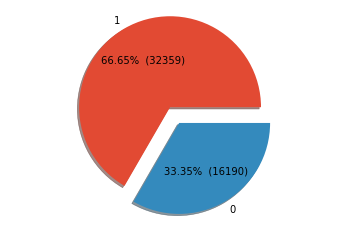

In [4]:
all_ticket_df=pd.read_csv("all_tickets_processed_2topics.csv",
                          encoding='utf-8')

all_ticket_df.head()

labelData = all_ticket_df['Target']
data = all_ticket_df['body']

plot_pie(labelData)


# Training and Test DataSets

In [5]:
from numpy import array
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

# Split dataset into training and testing data
train_data, test_data, train_labels, test_labels = train_test_split(
        data, labelData, test_size=0.2
    )  # split data to train/test sets with 80:20 ratio

print ('Size of training data is-',train_data.shape)
print ('Size of training labels is-',len(train_labels))
print ('Size of test data is-',test_data.shape)
print ('Size of test labels is-',len(test_labels))

Size of training data is- (38839,)
Size of training labels is- 38839
Size of test data is- (9710,)
Size of test labels is- 9710


# Load Embedding

In [6]:
# load the whole embedding into memory
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(train_data)
X_train = tokenizer.texts_to_sequences(train_data)
X_test = tokenizer.texts_to_sequences(test_data)
vocab_length = len(tokenizer.word_index) + 1

print ('Size of training data is-',len(X_train))
print ('Size of training labels is-',len(train_labels))
print ('Size of test data is-',len(X_test))
print ('Size of test labels is-',len(test_labels))

Size of training data is- 38839
Size of training labels is- 38839
Size of test data is- 9710
Size of test labels is- 9710


In [7]:
corpus = all_ticket_df['body'].to_list()
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))

print(length_long_sentence)

980


In [8]:
#padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')
X_train_pedd = pad_sequences(X_train, length_long_sentence, padding='post')
X_test_pedd = pad_sequences(X_test, length_long_sentence, padding='post')

print ('Size of training data is-',len(X_train_pedd))
print ('Size of training labels is-',len(train_labels))
print ('Size of test data is-',len(X_test_pedd))
print ('Size of test labels is-',len(test_labels))



Size of training data is- 38839
Size of training labels is- 38839
Size of test data is- 9710
Size of test labels is- 9710


# Build Model 

In [9]:
# define model
from tensorflow.keras import layers
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_length, 
                           output_dim=embedding_dim, 
                           input_length=length_long_sentence,
                           trainable=True))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


#Learning Rate
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9
    )

opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 980, 100)          1159500   
_________________________________________________________________
flatten (Flatten)            (None, 98000)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                980010    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 2,139,521
Trainable params: 2,139,521
Non-trainable params: 0
_________________________________________________________________


# Training Model

In [10]:
# fit the model

y_train = train_labels 
y_test = test_labels

print ('Size of training data is-',len(X_train_pedd))
print ('Size of training labels is-',len(y_train))
print ('Size of test data is-',len(X_test_pedd))
print ('Size of test labels is-',len(y_test))

#class_weight = class_weight.compute_class_weight('balanced', np.unique(y_train),y_train)

#Early Stopping
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",mode ="min", patience = 2,restore_best_weights = True) 


#Model Training/ Fitting
history = model.fit(X_train_pedd, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test_pedd, y_test), 
                    batch_size=32,
                    #class_weight=class_weight,
                    callbacks =[earlystopping])




Size of training data is- 38839
Size of training labels is- 38839
Size of test data is- 9710
Size of test labels is- 9710
Train on 38839 samples, validate on 9710 samples
Epoch 1/10
38839/38839 [==============================] - 29s 743us/sample - loss: 0.5477 - accuracy: 0.7151 - val_loss: 0.4064 - val_accuracy: 0.8240
Epoch 2/10
38839/38839 [==============================] - 27s 699us/sample - loss: 0.2911 - accuracy: 0.8740 - val_loss: 0.2834 - val_accuracy: 0.8726
Epoch 3/10
38839/38839 [==============================] - 27s 698us/sample - loss: 0.2257 - accuracy: 0.9047 - val_loss: 0.2342 - val_accuracy: 0.8958
Epoch 4/10
38839/38839 [==============================] - 27s 701us/sample - loss: 0.1944 - accuracy: 0.9177 - val_loss: 0.2234 - val_accuracy: 0.9162
Epoch 5/10
38839/38839 [==============================] - 27s 702us/sample - loss: 0.1653 - accuracy: 0.9327 - val_loss: 0.1920 - val_accuracy: 0.9220
Epoch 6/10
38839/38839 [==============================] - 30s 761us/sample

# Evaluating Model Performance

Training Accuracy: 96.8073
Testing Accuracy:  92.3687


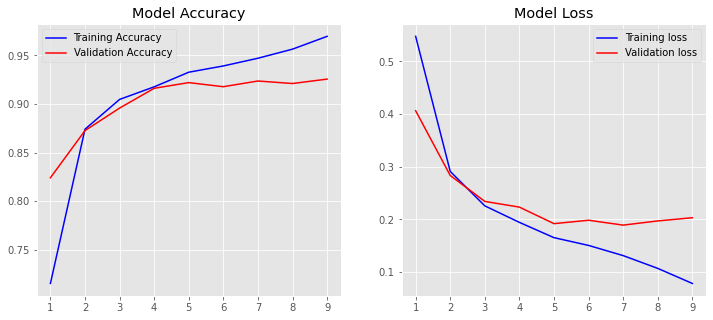

In [11]:
# evaluate the model

loss, accuracy = model.evaluate(X_train_pedd, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy*100))

loss, accuracy = model.evaluate(X_test_pedd, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy*100))

#print(history.history.keys())
plot_history(history)

# Prediction

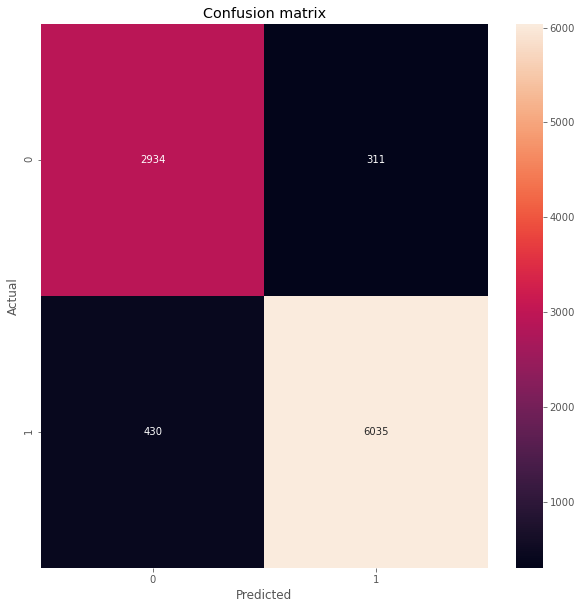

In [12]:
#Predict

y_pred = model.predict(X_test_pedd)
y_pred_bool = np.round(y_pred)
conf_mat = confusion_matrix(y_test, y_pred_bool)



fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True,fmt='g',xticklabels=pd.Series(all_ticket_df['Target'].unique()).sort_values(), 
            yticklabels=pd.Series(all_ticket_df['Target'].unique()).sort_values(ascending=True))

plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Clssification Report

In [13]:
target_name = unique(all_ticket_df['Target'])
print(metrics.classification_report(y_test, y_pred_bool, target_names=target_name))


              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3245
           1       0.95      0.93      0.94      6465

    accuracy                           0.92      9710
   macro avg       0.91      0.92      0.92      9710
weighted avg       0.92      0.92      0.92      9710

